<a href="https://colab.research.google.com/github/Sneha-Sonkar/Predict-Electricity-Consumption/blob/main/Copy_of_Predict_Electricity_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kandij_electric_production_path = kagglehub.dataset_download('kandij/electric-production')

print('Data source import complete.')


100%|██████████| 2.63k/2.63k [00:00<00:00, 4.57MB/s]

Extracting files...
Data source import complete.


# Predict Electricity Consumption using Time Series Analysis

## What is Time Series analysis?

Time series forecasting is a technique for the prediction of events through a sequence of time. The technique is used across many fields of study, from geology to behaviour to economics. The techniques predict future events by analyzing the trends of the past, on the assumption that future trends will hold similar to historical trends.


**Time series forecasting is performed in a variety of applications including:**

1. Weather forecasting

2. Earthquake prediction

3. Astronomy

4. Statistics

5. Mathematical finance

6. Econometrics

7. Pattern recognition

8. Signal processing

9. Control engineering

Time series forecasting is sometimes just the analysis of experts studying a field and offering their predictions. In many modern applications, however, time series forecasting uses computer technologies, including:

1. Machine learning

2. Artificial neural networks

3. Support vector machines

4. Fuzzy logic

5. Gaussian processes

6. Hidden Markov models

There are two main goals of time series analysis: (a) identifying the nature of the phenomenon represented by the sequence of observations, and (b) forecasting (predicting future values of the time series variable). Both of these goals require that the pattern of observed time series data is identified and more or less formally described. Once the pattern is established, we can interpret and integrate it with other data (i.e., use it in our theory of the investigated phenomenon, e.g., seasonal commodity prices). Regardless of the depth of our understanding and the validity of our interpretation (theory) of the phenomenon, we can extrapolate the identified pattern to predict future events.


## Stages in Time Series Forecasting

Solving a time series problem is a little different as compared to a regular modeling task. A simple/basic journey of solving a time series problem can be demonstrated through the following processes. We will understand about tasks which one needs to perform in every stage.


We will also look at the python implementation of each stage of our problem-solving journey.

Steps are –


**1. Visualizing time series**

In this step, we try to visualize the series. We try to identify all the underlying patterns related to the series like trend and seasonality. Do not worry about these terms right now, as we will discuss them during implementation. You can say that this is more a type of exploratory analysis of time series data.


**2. Stationarising time series**

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., “stationarised”) through the use of mathematical transformations. A stationarised series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past! Another reason for trying to stationarise a time series is to be able to obtain meaningful sample statistics such as means, variances, and correlations with other variables. Such statistics are useful as descriptors of future behavior only if the series is stationary. For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables


**3. Finding the best parameters for our model**

We need to find optimal parameters for forecasting models one’s we have a stationary series. These parameters come from the ACF and PACF plots. Hence, this stage is more about plotting above two graphs and extracting optimal model parameters based on them. Do not worry, we will cover on how to determine these parameters during the implementation part below!


**4. Fitting model**

Once we have our optimal model parameters, we can fit an ARIMA model to learn the pattern of the series. Always remember that time series algorithms work on stationary data only hence making a series stationary is an important aspect


**5. Predictions**

After fitting our model, we will be predicting the future in this stage. Since we are now familiar with a basic flow of solving a time series problem, let us get to the implementation.



## Problem Statement

The dataset can be downloaded from here. It contains only 2 columns, one column is Date and the other column relates to the consumption percentage.

It shows the consumption of electricity from 1985 till 2018. The goal is to predict electricity consumption for the next 6 years i.e. till 2024.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Load the dataset

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file from your Google Drive folder "Colab Notebooks"

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Electric_Production.csv')
df

Mounted at /content/drive


,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


Now, Define column names, drop nulls, convert Date to DateTime format and make Date as an index column because it is not possible to plot the graph without index.

In [ ]:
df.columns=['Date', 'Consumption']
df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Now, let us start with our predefined steps:

### 1.Visualizing the time series.

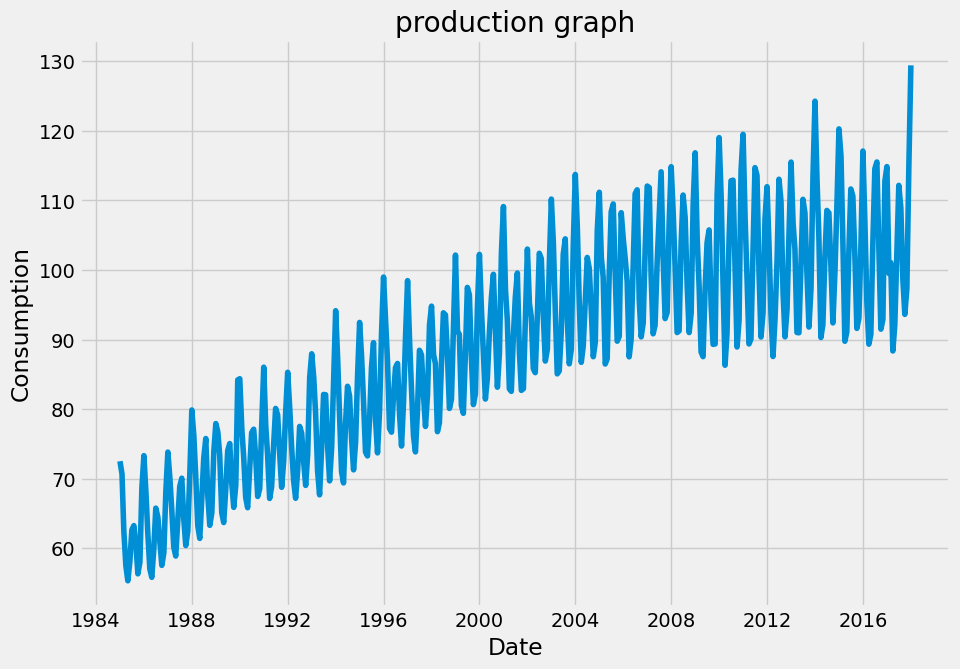

In [ ]:
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("production graph")
plt.plot(df)

Remember that for time series forecasting, a series needs to be stationary. The series should have a constant mean, variance, and covariance.


There are few points to note here, the mean is not constant in this case as we can clearly see an upward trend.


Hence, we have identified that our series is not stationary. We need to have a stationary series to do time series forecasting. In the next stage, we will try to convert this into a stationary series.


Lets us plot the scatterplot:

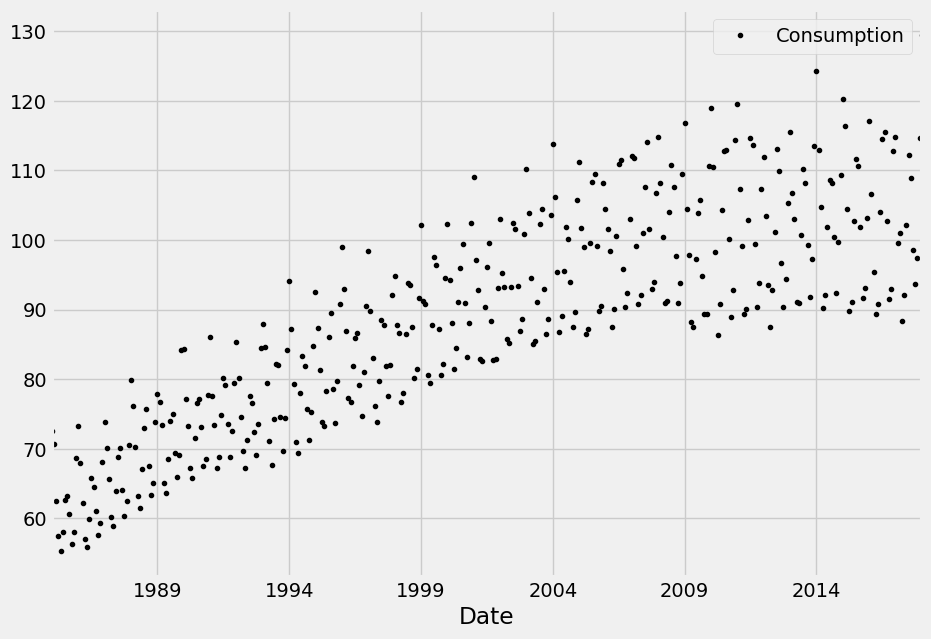

In [ ]:
df.plot(style='k.')
plt.show()

We can also visualize the data in our series through a distribution too.

<Axes: ylabel='Density'>

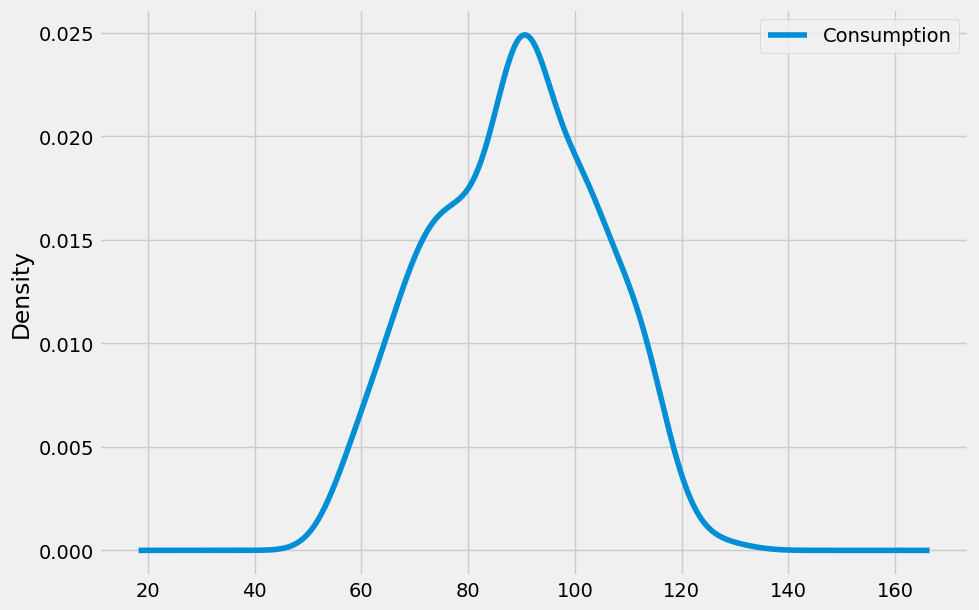

In [ ]:
df.plot(kind='kde')

We can observe a near-normal distribution(bell-curve) over consumption values.


Also, a given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

**Level**: The average value in the series.

**Trend**: The increasing or decreasing value in the series.

**Seasonality**: The repeating short-term cycle in the series.

**Noise**: The random variation in the series.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.


So let us separate Trend and Seasonality from the time series.

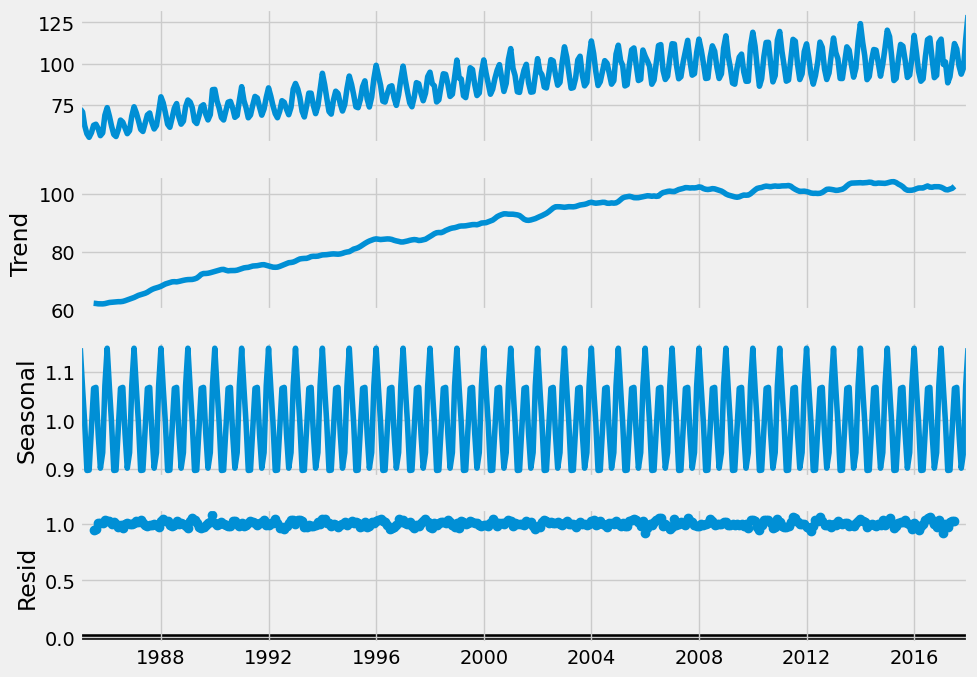

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

This gives us more insight into our data and real-world actions. Clearly, there is an upward trend and a recurring event where electricity consumption shoots maximum every year.

### 2. Stationarising the time series.


First, we need to check if a series is stationary or not.


#### ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:


**Null Hypothesis:** The series has a unit root (value of a =1)


**Alternate Hypothesis:** The series has no unit root.


If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).


If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.


The following function is one that can plot a series with its rolling mean and standard deviation.

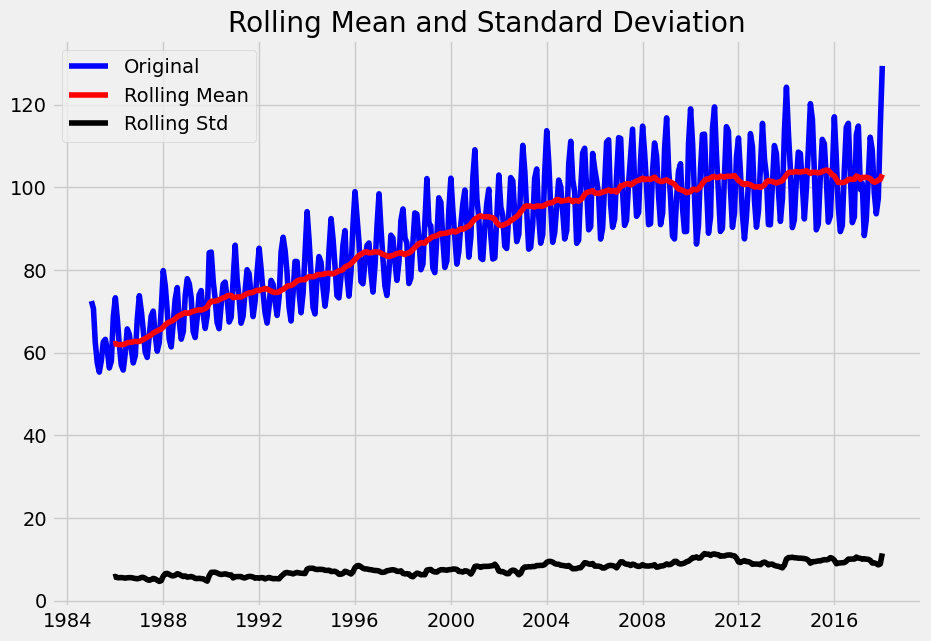

Results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #perform dickey fuller test
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Consumption'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df)

Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.


To get a stationary series, we need to eliminate the trend and seasonality from the series.


We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

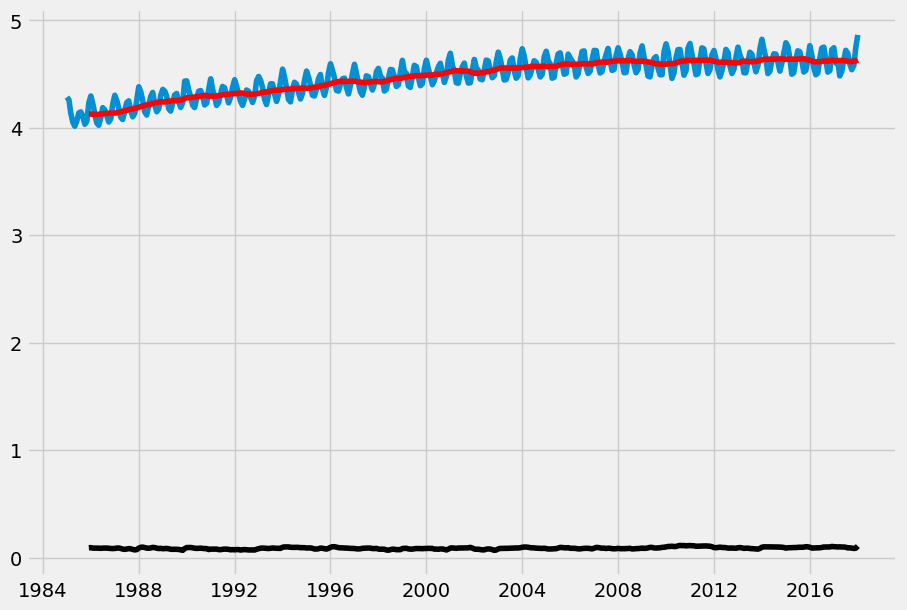

In [ ]:
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

After finding the mean, we take the difference of the series and the mean at every point in the series.

This way, we eliminate trends out of a series and obtain a more stationary series.

In [ ]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

Perform the Dickey-Fuller test (ADFT) once again. We have to perform this function every time to check whether the data is stationary or not.

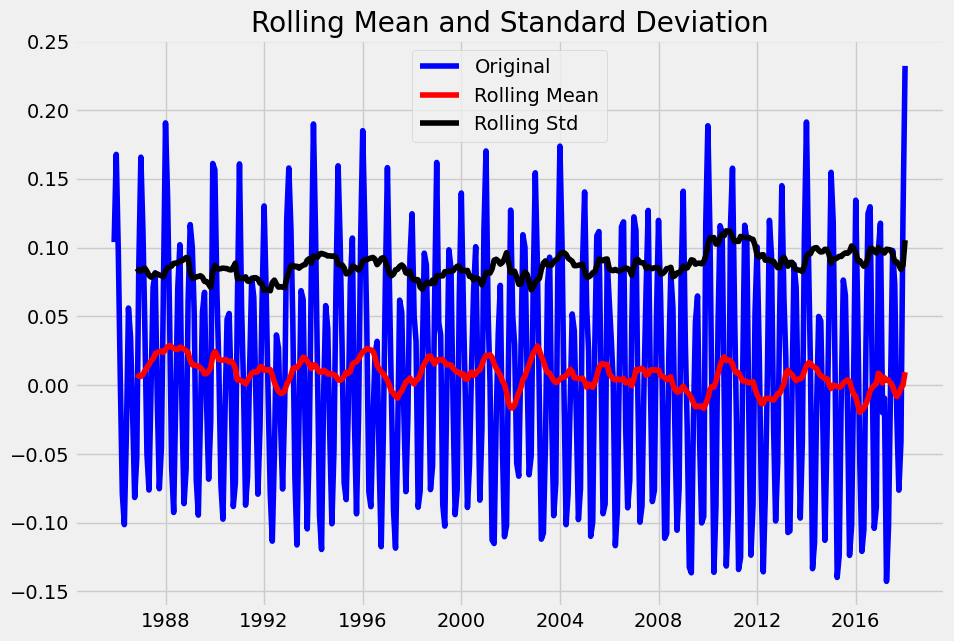

Results of dickey fuller test
Test Statistics                 -5.211586
p-value                          0.000008
No. of lags used                15.000000
Number of observations used    370.000000
critical value (1%)             -3.448148
critical value (5%)             -2.869383
critical value (10%)            -2.570948
dtype: float64


In [ ]:
test_stationarity(df_log_moving_avg_diff)

From the above graph, we observed that the data attained stationarity.

One of the modules is completed as we came to a conclusion. We need to check the weighted average, to understand the trend of the data in time series. Take the previous log data and to perform the following operation.

In [ ]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()

The exponential moving average (EMA) is a weighted average of the last n prices, where the weighting decreases exponentially with each previous price/period. In other words, the formula gives recent prices more weight than past prices.

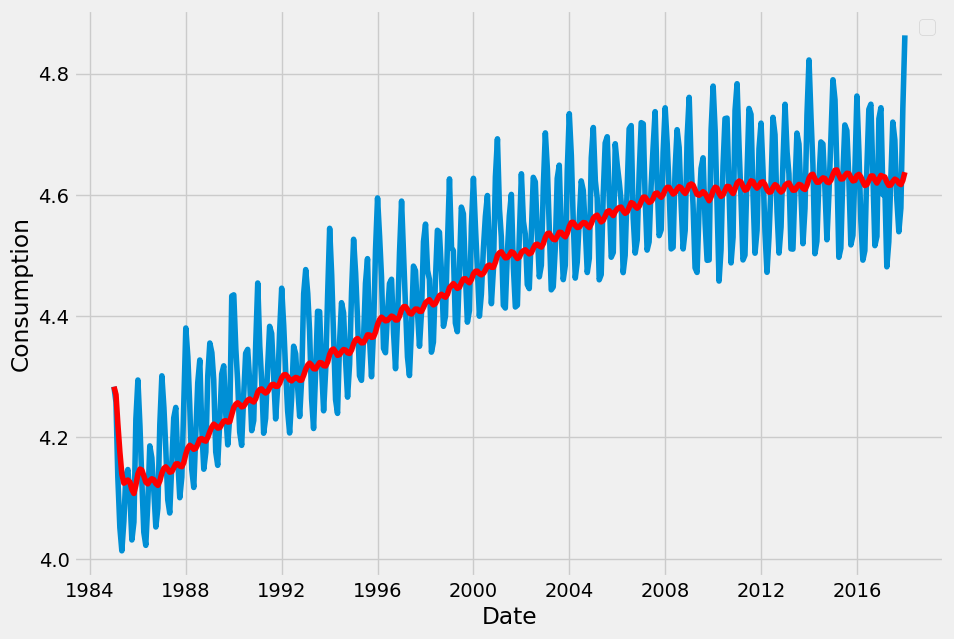

In [ ]:
plt.plot(df_log)
plt.plot(weighted_average, color='red')
plt.xlabel("Date")
plt.ylabel("Consumption")
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.legend()
plt.show(block =False)

Previously we subtracted df_log with moving average, now take the same df_log and subtract with weighted_average and perform the Dickey-Fuller test (ADFT) once again.

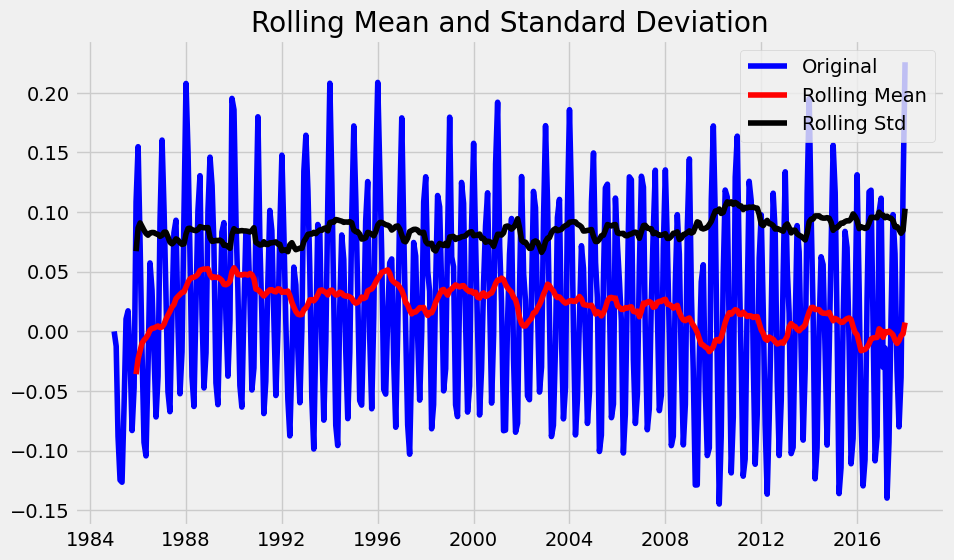

Results of dickey fuller test
Test Statistics                 -3.251531
p-value                          0.017189
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [ ]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

From the above graph, we observed that the data attained stationarity. We also see that the test statistics and critical value is relatively equal.

There can be cases when there is a high seasonality in the data. In those cases, just removing the trend will not help much. We need to also take care of the seasonality in the series. One such method for this task is differencing.


Differencing is a method of transforming a time series dataset.
It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.


Differencing is performed by subtracting the previous observation from the current observation.

Perform the Dickey-Fuller test (ADFT) once again.

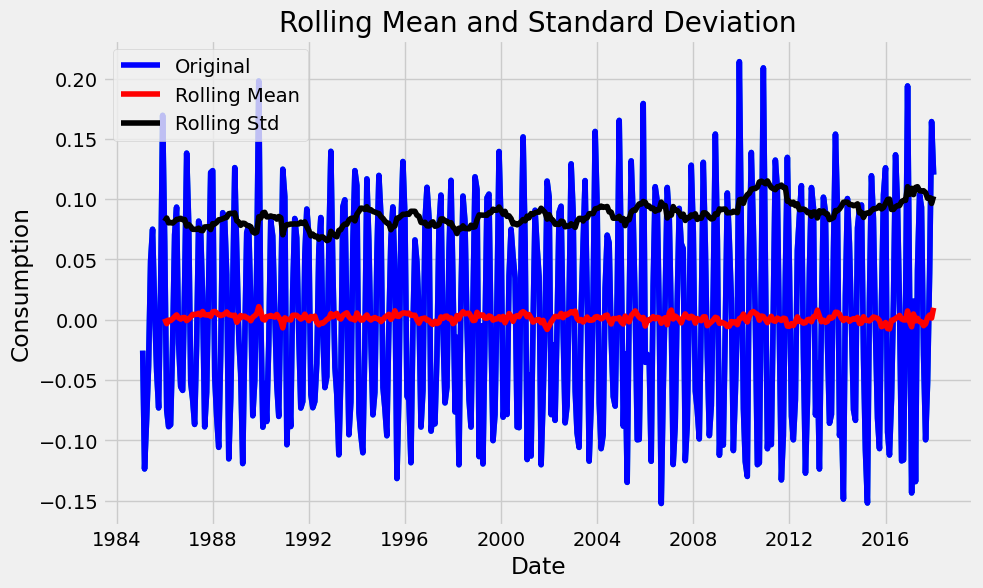

Results of dickey fuller test
Test Statistics               -6.748333e+00
p-value                        2.995161e-09
No. of lags used               1.400000e+01
Number of observations used    3.810000e+02
critical value (1%)           -3.447631e+00
critical value (5%)           -2.869156e+00
critical value (10%)          -2.570827e+00
dtype: float64


In [ ]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)

#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

The next step is to perform decomposition which provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

In [ ]:
!pip install chart_studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


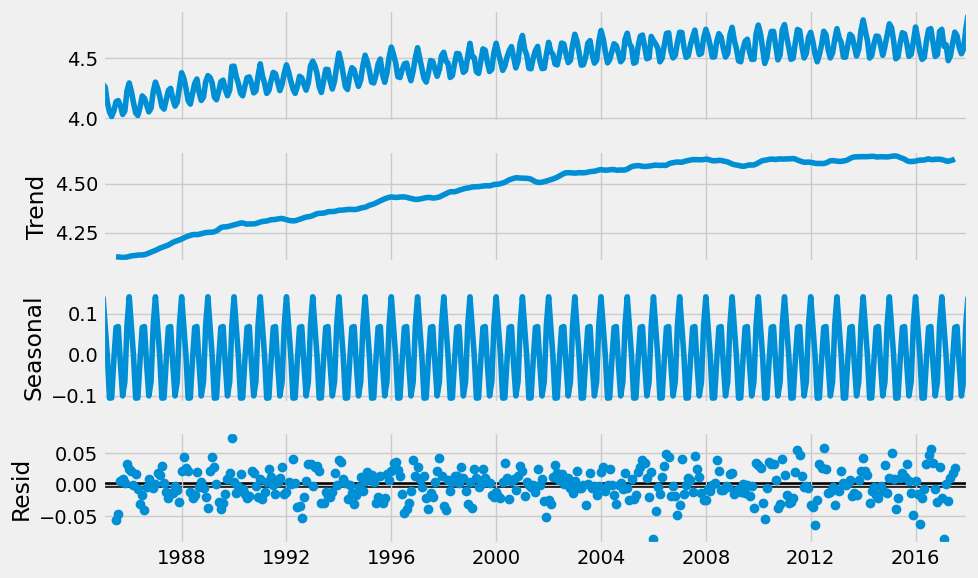

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Suppose df_log is your time series (e.g., log-transformed data)
# Decompose the time series using additive model
# 'period' is the number of observations per cycle (e.g., 12 for monthly data with yearly seasonality)
result = seasonal_decompose(df_log, model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()


Finally, perform the Dickey-Fuller test (ADFT) once again.

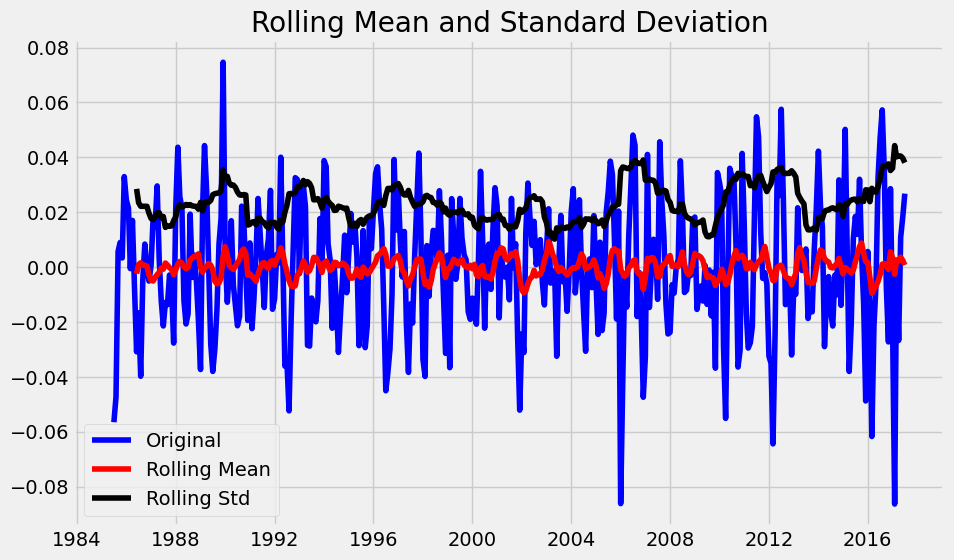

In [ ]:
def test_stationarity_final(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)



trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity_final(residual)

After the decomposition, if we look at the residual then we have clearly a flat line for both mean and standard deviation. We have got our stationary series and now we can move to find the best parameters for our model.

### 3. Finding the best parameters for our model

Before we go on to build our forecasting model, we need to determine optimal parameters for our model. For those optimal parameters, we need ACF and PACF plots.


A nonseasonal ARIMA model is classified as an “ARIMA(p,d,q)” model, where:

p → Number of autoregressive terms,
d → Number of nonseasonal differences needed for stationarity, and
q → Number of lagged forecast errors in the prediction equation.


Values of p and q come through ACF and PACF plots. So let us understand both ACF and PACF!

#### Autocorrelation Function(ACF)

Statistical correlation summarizes the strength of the relationship between two variables. Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.


We can calculate the correlation for time series observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.


A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.


#### Partial Autocorrelation Function(PACF)

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.


The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.


The autocorrelation for observation and observation at a prior time step is comprised of both the direct correlation and indirect correlations. It is these indirect correlations that the partial autocorrelation function seeks to remove.


Below code plots, both ACF and PACF plots for us:

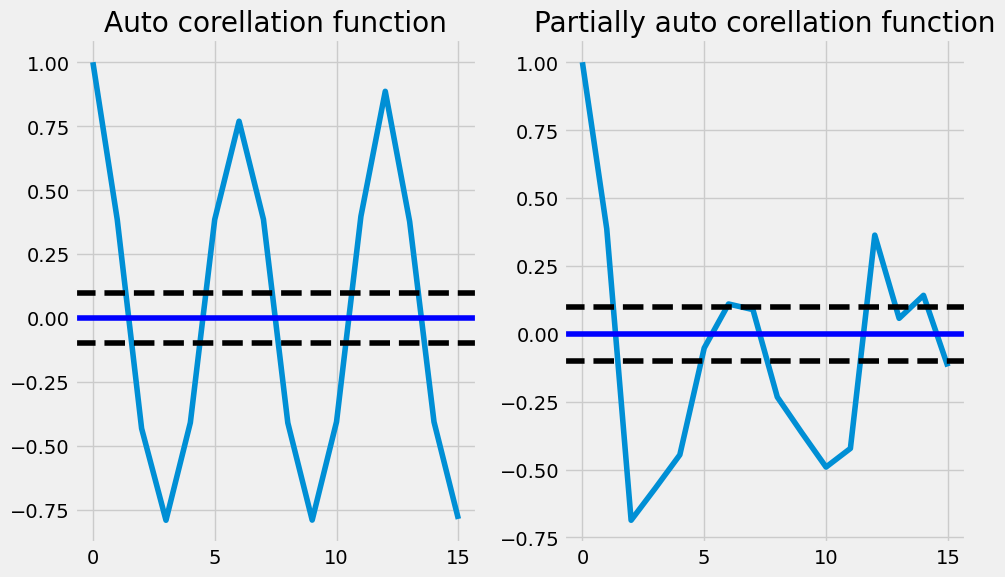

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')#plot PACF
plt.subplot(121)
plt.plot(acf)
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf)
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

### 4. Fitting model

In order to find the p and q values from the above graphs, we need to check, where the graph cuts off the origin or drops to zero for the first time from the above graphs the p and q values are merely close to 3 where the graph cuts off the origin ( draw the line to x-axis) now we have p,d,q values. So now we can substitute in the ARIMA model and let's see the output.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


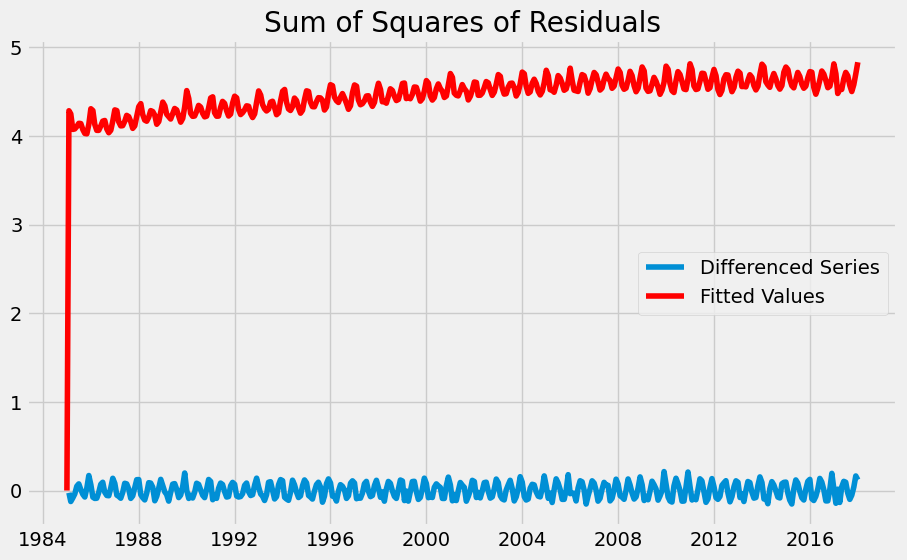

RSS: nan


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

# Ensure df_log is a pandas Series
# If df_log is a DataFrame with a column named 'Consumption':
if isinstance(df_log, pd.DataFrame):
    df_log = df_log['Consumption']

# Convert all values to numeric, invalid parsing becomes NaN
df_log = pd.to_numeric(df_log, errors='coerce')
df_log = df_log.dropna()  # remove NaNs

# Fit ARIMA model
model = ARIMA(df_log, order=(3, 1, 3))
result_AR = model.fit()

# Differenced series
df_log_diff = df_log.diff().dropna()

# Plot differenced series vs fitted values
plt.plot(df_log_diff, label='Differenced Series')
plt.plot(result_AR.fittedvalues, color='red', label='Fitted Values')
plt.title("Sum of Squares of Residuals")
plt.legend()
plt.show()

# Calculate RSS
rss = sum((result_AR.fittedvalues - df_log_diff)**2)
print('RSS: %f' % rss)


Less the RSS value, the more effective the model is. You check with (2,1,0),(3,1,1), etc to look for the smallest values of RSS.

### 5. Predictions

The following code helps us to forecast shampoo sales for the next 6 years.

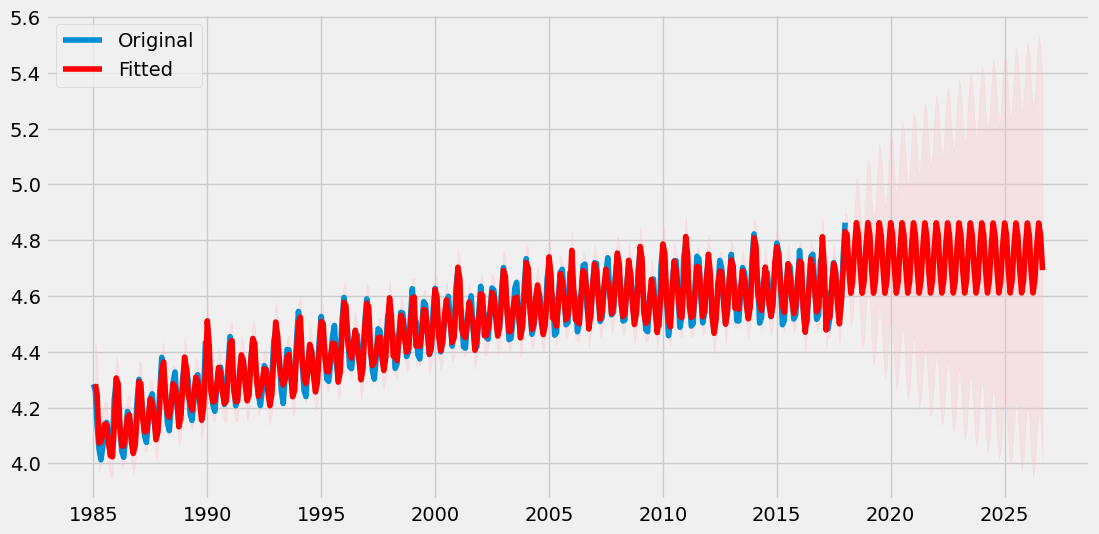

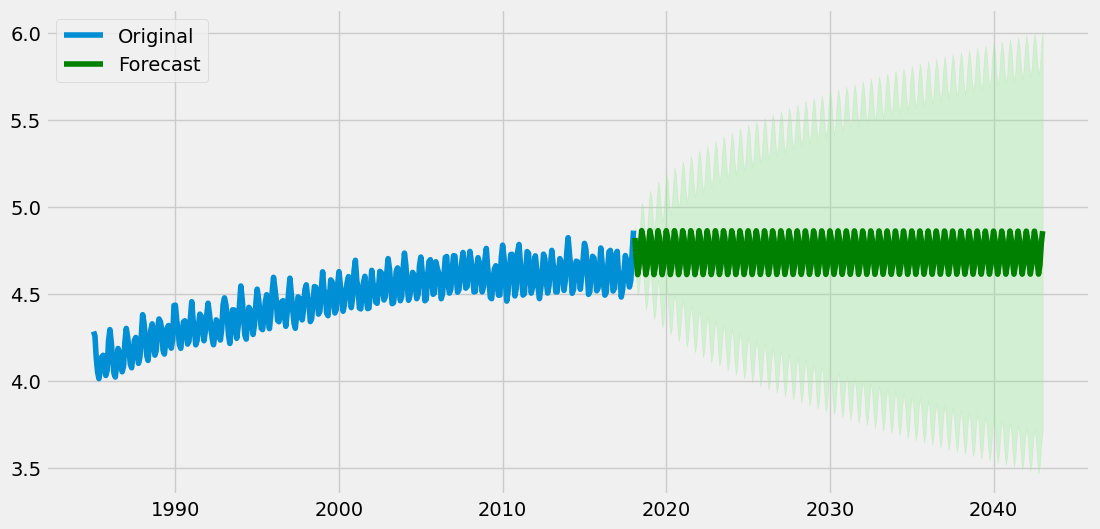

In [ ]:
import matplotlib.pyplot as plt

# Plot in-sample predictions + forecast
# In-sample prediction (start=1, end=500)
pred = result_AR.get_prediction(start=1, end=500)
pred_ci = pred.conf_int()  # confidence interval

plt.figure(figsize=(12,6))
plt.plot(df_log, label='Original')
plt.plot(pred.predicted_mean, color='red', label='Fitted')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

# Forecast future 300 steps
forecast = result_AR.get_forecast(steps=300)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(df_log, label='Original')
plt.plot(forecast_mean.index, forecast_mean, color='green', label='Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1], color='lightgreen', alpha=0.3)
plt.legend()
plt.show()


From the above graph, we calculated the future predictions till 2024 the greyed out area is the confidence interval that means the predictions will not cross that area.